In [1]:
from FW_and_pingpong import *
from functions import *
import numpy as np

# No noise


In [2]:
np.linalg.norm(X.T@X -  Y.T@Y) #equal since Pstar = id wlog

NameError: name 'X' is not defined

Trace with P = -1.5543122344752192e-15
Trace with P_alt = -39.187027524451864
--------- Step 0 ---------
0.9999940391390134


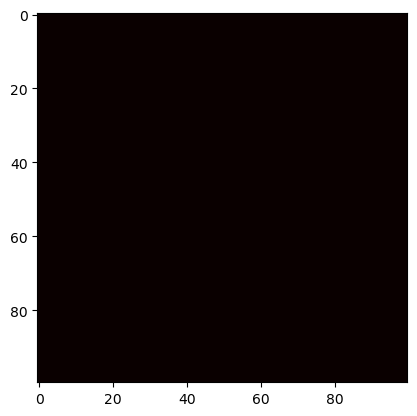

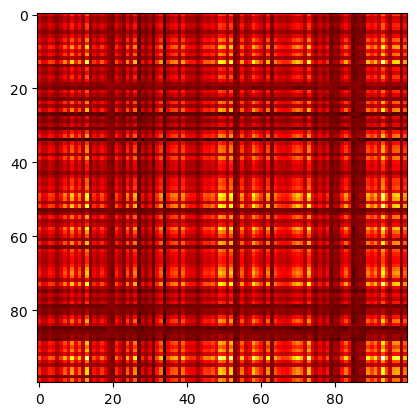

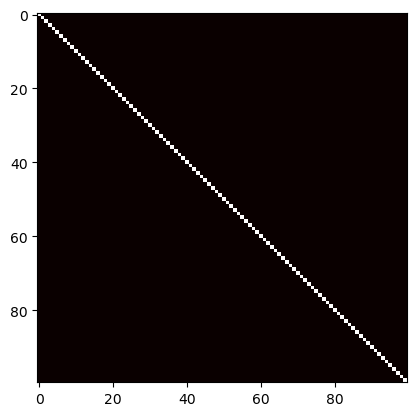

Trace with P = -8.382466493017657e-07
Trace with P_alt = -0.00022108715164245396
--------- Step 1 ---------
5.9608609865491405e-06


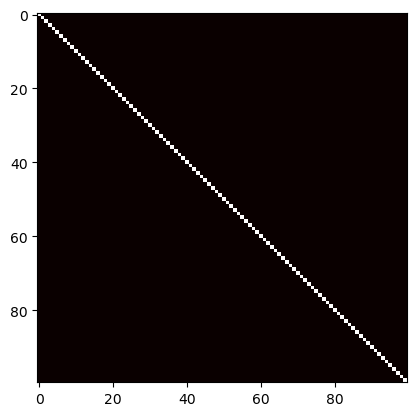

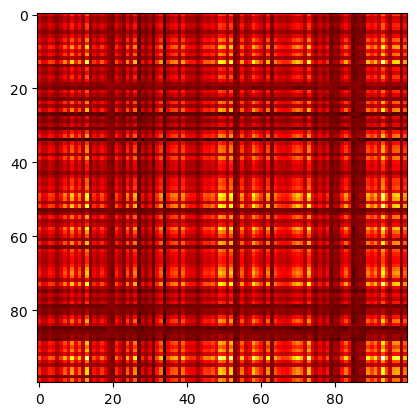

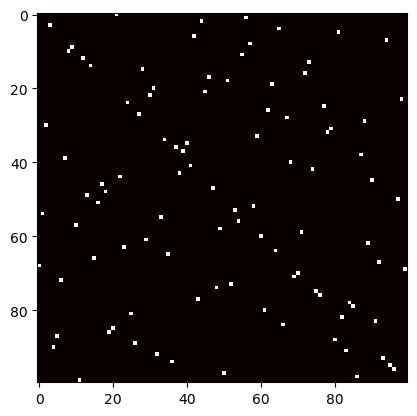

Trace with P = 0.010808827892864699
Trace with P_alt = -0.0010462193051436765
--------- Step 2 ---------
5.9608609865491405e-06


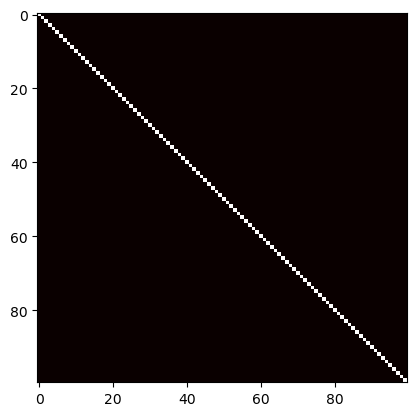

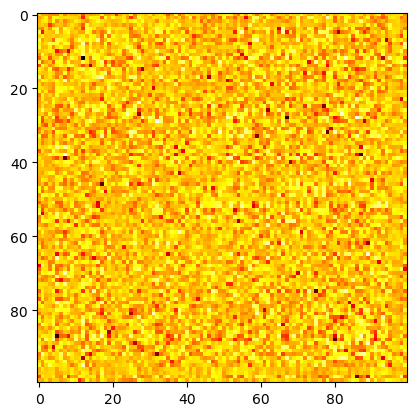

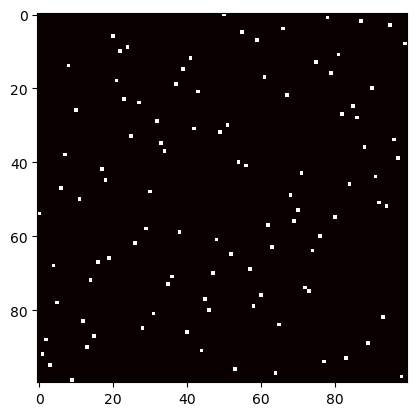

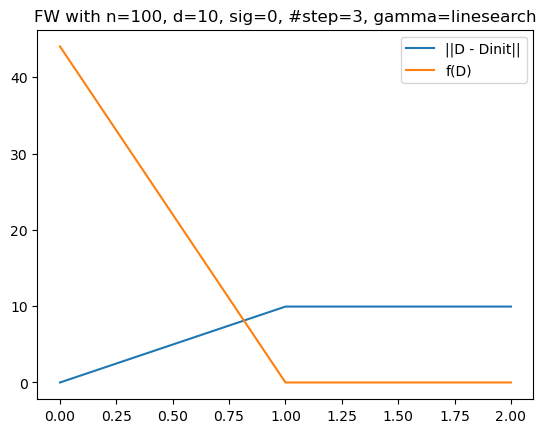

Trace with P = 989.9797329872445
Trace with P_alt = 13.613950894703214
Trace with P = 989.979732988273
Trace with P_alt = 42.137297689988046
Ov=1.0, perm_l2=0.00, ortho_l2=0.00: FW basic w 2-step PP & n=100, d=10, sig=0, seed=2311, nsteps=3 linesearch


In [5]:
X, Y, Pstar, Qstar, Pfinal, Qfinal, PQ0 = experiment(
    100, 10, 0, frank_wolfe, opt_steps=3, stepsize="linesearch", plot_opt=True, seed_XYZ=2311)

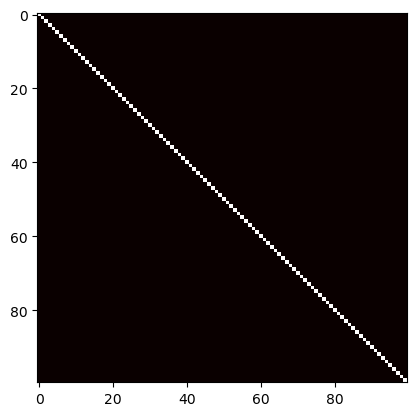

In [3]:
matrix_heatmap(PQ0)

In [4]:
np.linalg.norm(PQ0 - Pstar)

0.00014392650667149816

## Ace estimator

In [5]:
n = 100
d = 10
sigma = 0
X, Y, Pstar, Qstar, Pfinal, Qfinal =experiment(n, d, sigma, Qinit)

TypeError: Qinit() takes 10 positional arguments but 11 were given

In [ ]:
L2ortho_squared(Qstar, -Qfinal)

In [ ]:
L = []
for i in range(50):
    Helper = np.random.randn(d, d)
    Qalea, _ = scipy.linalg.qr(Helper)
    Helper = np.random.randn(d, d)
    Qalea2, _ = scipy.linalg.qr(Helper)
    L.append(L2ortho_squared(Qalea, Qalea2))
np.mean(L)

In [ ]:
X, Y, _, _, _, _ =experiment(n, d, sigma, frank_wolfe, 1, "linesearch")

In [ ]:
matrix_heatmap(X@X.T)

### Maxtrace (GW)

In [ ]:
from FW_and_pingpong import *
from functions import *
import numpy as np

In [ ]:
for sigma in [0.01, 0.1, 0.5]:
    for d in [5, 50]:
        print("----- d="+str(d)+ ", sigma="+str(sigma)+" -----")
        for opt_steps in [5, 100]:
            n = 100
            experiment(n, d, sigma, frank_wolfe, opt_steps, 1/50 ,method = "maxtrace", plot_opt=False)
            experiment(n, d, sigma, frank_wolfe, opt_steps, 1/50, plot_opt=False)
            experiment(n, d, sigma, frank_wolfe, opt_steps, "linesearch" ,method = "maxtrace", plot_opt=False)
            experiment(n, d, sigma, frank_wolfe, opt_steps, 'linesearch', plot_opt=False)

# Frank-Wolfe simultaneously in Q and P

Idea: Relax to $ \Vert Q \Vert_2 \leq 1$ and $P \in \mathcal{D}_n$; the cartesian product of these two sets.


In [1]:
from FW_simultaneous import *
from FW_and_pingpong import *
import numpy as np
from functions import *

In [2]:
n = 100
d = 10
sigma = 0.2
opt_steps = 20

seed_XYZ = 342

A_eq, b_eq = equality_constraints(n)
X, Y, Pstar, Qstar = initialise_XYPstarQstar(n, d, sigma, seed_XYZ)

R, D = FW_simultaneous(X, Y, opt_steps, A_eq, b_eq)

In [3]:
P1 = perm_from_ortho(R, X, Y, A_eq, b_eq)
P2 = perm_from_ortho(ortho_from_perm(D, X, Y), X, Y, A_eq, b_eq)

print("Overlap after FW and one ping or pingpong:")
print(overlap(P1, Pstar), overlap(P2, Pstar))

_, P3, _ = pingpong(P1, Pstar, Qstar, X, Y, A_eq, b_eq)
_, P4, _ = pingpong(D, Pstar, Qstar, X, Y, A_eq, b_eq)

print("Overlap after pingpong:")
print(overlap(P3, Pstar), overlap(P4, Pstar))

Overlap after FW and one ping or pingpong:
0.24 0.15
Overlap after pingpong:
1.0 0.17


In [4]:
opt_steps = 20
D_normal = frank_wolfe(X, Y, Pstar, Qstar, sigma, opt_steps, A_eq, b_eq, "linesearch", method="", plot=False)

In [5]:
_, P_normal, _ = pingpong(D_normal, Pstar, Qstar, X, Y, A_eq, b_eq)
overlap(P_normal, Pstar)

1.0